# Tokyo 2020 Summer Olympics

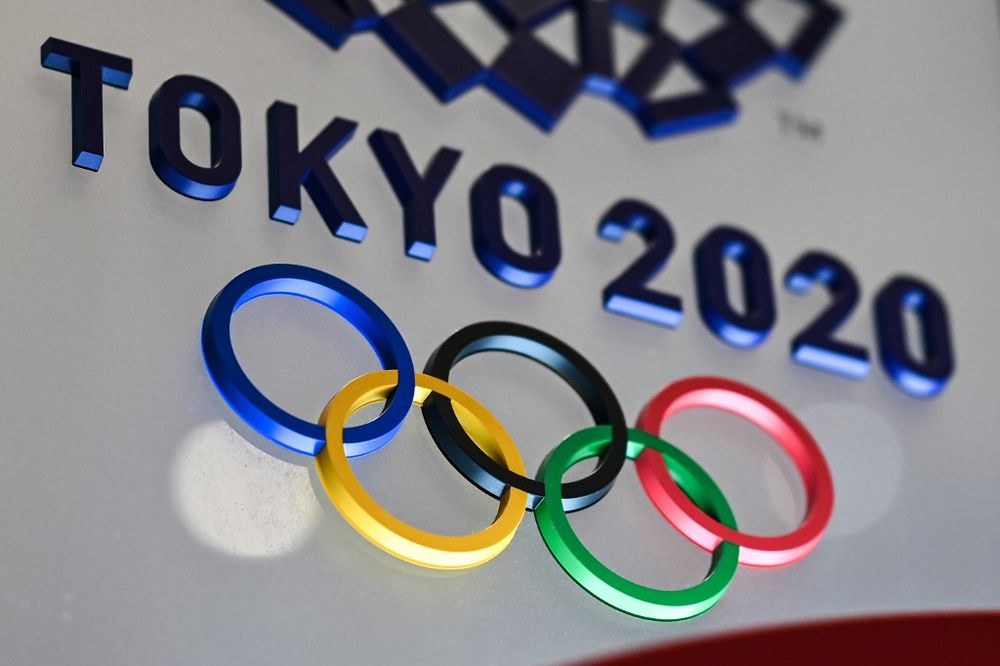

# Table of Content

1. Introduction
2. Aim of the Project
3. Data Exploration & Visualization
4. Conclusion

# Introduction

Olympics are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from over 200 nations participate in a variety of competitions. The olympic games are held every four years alternating between Summer and Winter Olympics every two years in a four year period.

The summer olympics of 2020, was held in Tokyo from 23 July to 8 August 2021. The Tokyo 2020 Games were an unprecedented demonstration of unity and solidarity as the world came together for the first time following the onset of the COVID-19 pandemic for an Olympic Games focused on the pure essentials: a celebration of athletes and sport.

# Aim of The Project

To perform Explanatory Data Analysis for The Tokyo 2020 Olympics Dataset using Python. In this project, some libraries is used for support the exploratory analysis. Pandas will use for data cleaning and manipulation, then seaborn will be use for data visualization purpose.

# Tokyo 2020 Olympics Data Exploration and Visualization

Importing libraries and reading the dataset

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
!pip install openpyxl
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/EntriesGender.xlsx
/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Coaches.xlsx
/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Medals.xlsx
/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Teams.xlsx
/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Athletes.xlsx


In [10]:
entries_gender = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/EntriesGender.xlsx')
coaches = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Coaches.xlsx')
medals = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Medals.xlsx')
teams = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Teams.xlsx')
athletes = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tokyo Olympics/Athletes.xlsx')

Data summarize
*   **Entries_gender** provides information about the number of males and females participating in different sports.
*   **coaches** provides information about the coaches, their sport and country of origin
*   **medals** provides information on the number of gold, silver and bronze medals won by a country
*   **teams** provides information on the sport teams, event of participation and country of origin
*   **athletes** provides information about the athletes participating in Tokyo Olympics








In [11]:
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [12]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [14]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [15]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [16]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [19]:
print("The number of athletes that participated in Olympics 2020 is " + str(athletes.shape[0]))
print("The number of sports categories in Olympics 2020 is " + str(athletes.Discipline.nunique()))
print("The number of countries that participated in Olympics 2020 is " + str(athletes.NOC.nunique()))
print("The number of coaches present in Olympics 2020 is " + str(coaches.shape[0]))

The number of athletes that participated in Olympics 2020 is 11085
The number of sports categories in Olympics 2020 is 46
The number of countries that participated in Olympics 2020 is 206
The number of coaches present in Olympics 2020 is 394


In [30]:
medals[medals['Team/NOC']=='Indonesia']

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
54,55,Indonesia,1,1,3,5,42


In [49]:
athletes_country_num = athletes.pivot_table(values='Name', index='NOC', aggfunc=pd.Series.nunique)
athletes_country_num.reset_index(inplace = True)
athletes_country_num.rename(columns = {'Name':'Count of Athletes'}, inplace = True)
athletes_country_num.sort_values(by =['Count of Athletes'],ascending=False, inplace = True)
fig = px.bar(athletes_country_num,x = 'NOC', y='Count of Athletes',height=800, title='Distribution of Athletes across Countries')
fig.update_xaxes(tickangle=270)
fig.show()



*   Most athletes belong to United States of America, Japan, Australia, Germany and People's Republic of China



In [51]:
num_athletes_sportwise = athletes.pivot_table(index ='Discipline',values='Name',aggfunc=pd.Series.nunique)
num_athletes_sportwise.reset_index(inplace = True)
num_athletes_sportwise.rename(columns = {'Name':'Count of Athletes'}, inplace = True)
num_athletes_sportwise.sort_values(by =['Count of Athletes'],ascending=False, inplace = True)
fig = px.bar(num_athletes_sportwise,x = 'Discipline', y='Count of Athletes',height=600, title='Distribution of Athletes across different Sports' )
fig.update_xaxes(tickangle=270)
fig.show()



*   Sports such as Athletics, Swimming and Football receive highest participation.
*   Cycling, Trampoline Gymnastics and Sport Climbing BMX Freestyle receive lowest participation.



In [47]:
num_coaches_sportwise = coaches.pivot_table(index ='Discipline',values='Name',aggfunc=pd.Series.nunique)
num_coaches_sportwise.reset_index(inplace = True)
num_coaches_sportwise.rename(columns = {'Name':'Count of Coaches'}, inplace = True)
num_coaches_sportwise.sort_values(by =['Count of Coaches'],ascending=False, inplace = True)
fig = px.bar(num_coaches_sportwise,x = 'Discipline', y='Count of Coaches',width=500, height=600, title='Distribution of Coaches across different Sport Categories')
fig.update_xaxes(tickangle=270)
fig.show()



*   Coaches are present for 9 sport categories amongst which Basketball, Football and Artistic Swimming have the highest number of coaches allocated.

